In [5]:
import pandas as pd
import numpy as np
import warnings
from qiskit import IBMQ
from qiskit import *
import os
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import pandas as pd
from qiskit import Aer, QuantumCircuit, execute
from qiskit_machine_learning.algorithms import QSVC
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.utils import QuantumInstance
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore", category=DeprecationWarning)
from qiskit import IBMQ
import matplotlib.pyplot as plt
from qiskit_algorithms.utils import algorithm_globals
algorithm_globals.random_seed = 12345
print('complete')

complete


In [6]:
print(os.getcwd())

C:\Users\theda


In [7]:
data_full = pd.read_csv('crop yield data sheet - Copy.csv')
data = data_full.sample(frac=1.0)
        
print (len(data_full))
print (len(data))
data.head(6)

98
98


,1,2,3,4,5,6,7
20,410,50,37,59,19,15,6
13,425,50,37,65,18,19,9
65,410,55,38,68,20,16,7
49,450,50,37,60,18,15,6
78,1175,70,28,70,22,19,10
35,500,50,37,65,18,19,9


In [8]:
data_array1 = np.array(data['1'])
data_array2 = np.array(data['2'])
data_array3 = np.array(data['3'])
data_array = np.vstack((data_array1, data_array2, data_array3)).T
print(data_array)

[[ 410   50   37]
 [ 425   50   37]
 [ 410   55   38]
 [ 450   50   37]
 [1175   70   28]
 [ 500   50   37]
 [1200   75   27]
 [1275   76   26]
 [ 415   55   38]
 [ 450   55   38]
 [ 450   65   35]
 [1300   80   28]
 [1200   75   27]
 [1275   77   27]
 [1200   77   29]
 [ 475   60   39]
 [ 410   60   39]
 [ 425   70   39]
 [1225   75   28]
 [ 450   70   36]
 [1250   75   27]
 [1275   76   26]
 [1250   70   24]
 [1225   79   29]
 [ 440   58   37]
 [1245   77   27]
 [1250   75   29]
 [1150   80   26]
 [ 425   55   38]
 [1245   78   27]
 [ 425   55   36]
 [1280   80   26]
 [1275   77   28]
 [1275   71   28]
 [1225   75   28]
 [1200   79   27]
 [ 450   50   37]
 [1200   72   29]
 [ 400   60   39]
 [ 450   65   39]
 [ 430   65   39]
 [ 480   60   36]
 [ 410   52   40]
 [ 400   50   39]
 [1220   79   28]
 [ 450   56   40]
 [1175   78   28]
 [1300   70   24]
 [1200   73   29]
 [ 425   65   37]
 [1250   80   26]
 [1250   70   24]
 [1225   73   29]
 [ 475   72   36]
 [ 475   62   37]
 [1300   7

In [24]:
target_array = data["7"] 
for i in range(len(target_array)):

    if target_array[i] < 10:
        target_array[i] = 0


    if target_array[i] > 9:
        target_array[i] = 1

print(target_array)

20    0
13    0
65    0
49    0
78    1
     ..
18    1
0     1
48    1
19    1
91    0
Name: 7, Length: 98, dtype: int64


In [10]:
features = data_array
labels = np.array(target_array)

In [11]:
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)

In [14]:
feature_names = ['1', '2', '3']
feature_names_array = np.array(feature_names)
print(feature_names_array)

['1' '2' '3']


D:\Coding\envs\Qiskit\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Coding\envs\Qiskit\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Coding\envs\Qiskit\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Coding\envs\Qiskit\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When 

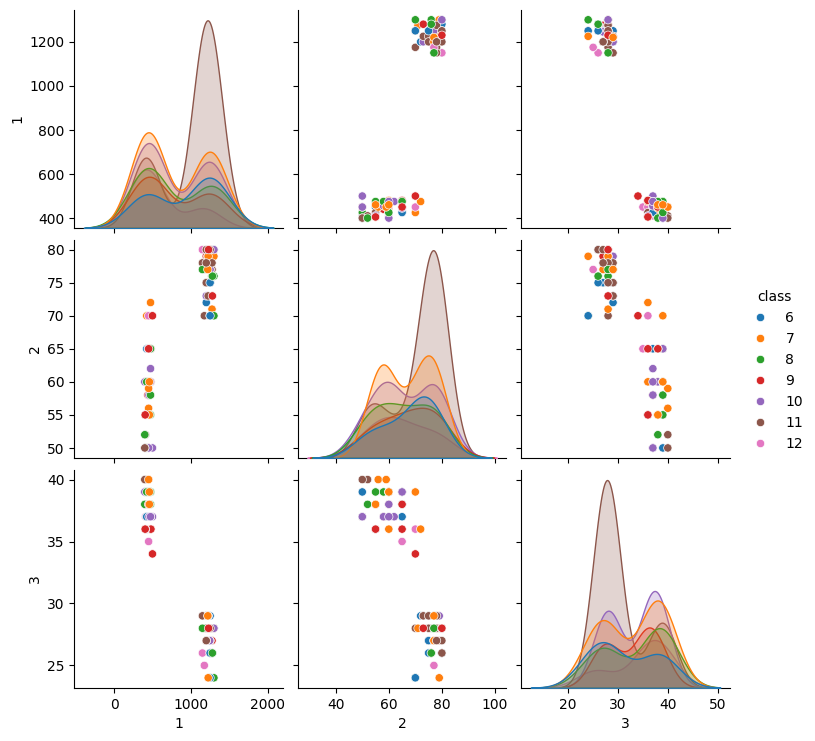

In [15]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(data_array, columns=feature_names_array)
df["class"] = pd.Series(target_array)

sns.pairplot(df, hue="class", palette="tab10")

In [16]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.7, random_state=algorithm_globals.random_seed
)

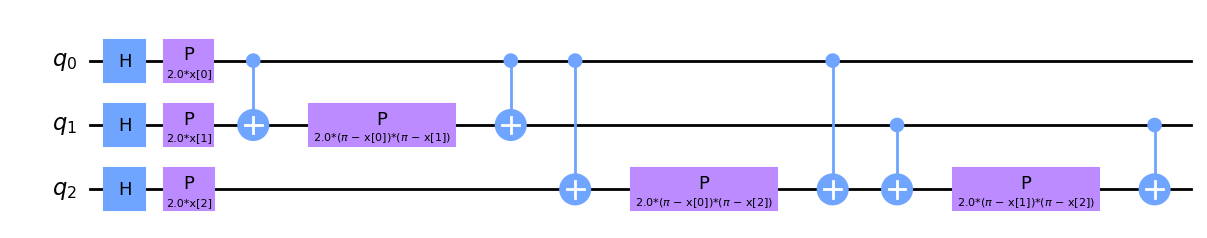

In [17]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

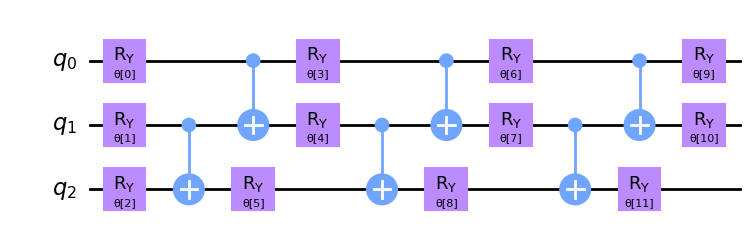

In [18]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [19]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [20]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [21]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

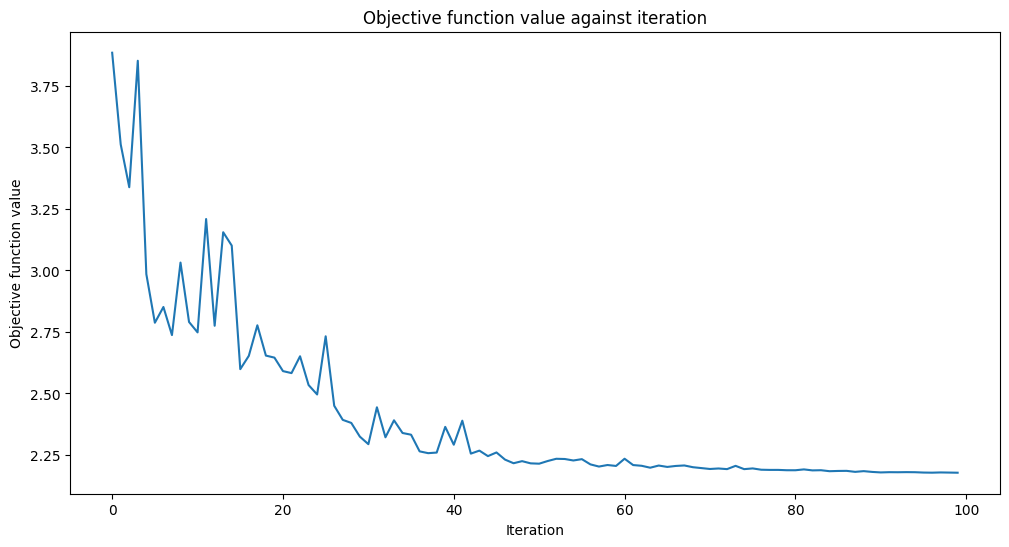

Training time: 64 seconds


In [22]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
print(train_labels[:5])
print(train_features[:5])
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [23]:
train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.22
Quantum VQC on the test dataset using RealAmplitudes:     0.20
